In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

In [2]:
# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1eaa7319fad544f224f5dfc098ae6a79


In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [6]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

teahupoo pf
ishigaki jp
port alfred za
broome au
attawapiskat ca
tilichiki ru
albany au
cap malheureux mu
hirara jp
barentsburg sj
punta arenas cl
xiongyue cn
horsham au
rio gallegos ar
ribeira grande pt
sinnamary gf
tuy hoa vn
bengkulu id
bambous virieux mu
yellowknife ca
ushuaia ar
nome us
barentsburg sj
isangel vu
seoul kr
marcona pe
taolanaro mg
busselton au
lar ir
tokat tr
ndago tz
dikson ru
north myrtle beach us
kaitangata nz
punta arenas cl
georgetown sh
atuona pf
nobres br
trelew ar
thompson ca
tazovskiy ru
hobart au
nantucket us
butaritari ki
xiongzhou cn
flinders au
palmer us
lac du bonnet ca
kodiak us
chhukha bt
ballina ie
abu kamal sy
mar del plata ar
meyungs pw
vaini to
morant bay jm
carnarvon au
hilo us
east london za
college us
busselton au
alofi nu
taolanaro mg
ushuaia ar
ushuaia ar
hobart au
puerto ayora ec
chokurdakh ru
vung tau vn
vaini to
mataura pf
butaritari ki
hidalgo mx
rikitea pf
tiksi ru
cabo san lucas mx
port elizabeth za
faanui pf
illoqqortoormiut gl
east lo

kapaa us
barrow us
bud no
kadykchan ru
cidreira br
nanortalik gl
punta arenas cl
tucurui br
fare pf
punta arenas cl
vardo no
georgetown sh
longyearbyen sj
taolanaro mg
mys shmidta ru
sisimiut gl
hilo us
cape town za
taolanaro mg
quatre cocos mu
didwana in
vestmanna fo
doctor pedro p. pena py
kapaa us
husavik is
ushuaia ar
haines junction ca
salalah om
hermanus za
ushuaia ar
broken hill au
milazzo it
komsomolskiy ru
bud no
vaitupu wf
busselton au
uarini br
kirakira sb
nikolskoye ru
bajil ye
talnakh ru
barrow us
nanortalik gl
bengkulu id
port elizabeth za
hihifo to
rikitea pf
san quintin mx
nenjiang cn
mahebourg mu
bambous virieux mu
bredasdorp za
aitape pg
coari br
methoni gr
fort nelson ca
los llanos de aridane es
tiksi ru
haibowan cn
busselton au
rikitea pf
turayf sa
airai pw
rikitea pf
rikitea pf
jamestown sh
rikitea pf
kaitangata nz
kodiak us
hithadhoo mv
leningradskiy ru
vila velha br
straseni md
bethel us
kieta pg
mataura pf
talnakh ru
kang bw
rikitea pf
teya ru
sambava mg
cabo sa

In [11]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

617

In [77]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
# 1. reference the index and the city in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | teahupoo
Processing Record 2 of Set 1 | ishigaki
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | broome
Processing Record 5 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 6 of Set 1 | tilichiki
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | cap malheureux
Processing Record 9 of Set 1 | hirara
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | xiongyue
Processing Record 13 of Set 1 | horsham
Processing Record 14 of Set 1 | rio gallegos
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | sinnamary
Processing Record 17 of Set 1 | tuy hoa
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | bambous virieux
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | ushuaia

Processing Record 39 of Set 4 | guerrero negro
Processing Record 40 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 41 of Set 4 | pangkalanbuun
Processing Record 42 of Set 4 | kapuskasing
Processing Record 43 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 44 of Set 4 | ust-nera
Processing Record 45 of Set 4 | la rioja
Processing Record 46 of Set 4 | klaksvik
Processing Record 47 of Set 4 | monrovia
Processing Record 48 of Set 4 | maesteg
Processing Record 49 of Set 4 | norman wells
Processing Record 50 of Set 4 | ostrovnoy
Processing Record 1 of Set 5 | yurginskoye
Processing Record 2 of Set 5 | uray
Processing Record 3 of Set 5 | hithadhoo
Processing Record 4 of Set 5 | ust-kishert
Processing Record 5 of Set 5 | groa
Processing Record 6 of Set 5 | sao joao da barra
Processing Record 7 of Set 5 | airai
Processing Record 8 of Set 5 | thunder bay
Processing Record 9 of Set 5 | mangai
Processing Record 10 of Set 5 | bethel
Processing Record 11 

Processing Record 24 of Set 8 | barawe
City not found. Skipping...
Processing Record 25 of Set 8 | taltal
Processing Record 26 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 27 of Set 8 | juneau
Processing Record 28 of Set 8 | turayf
Processing Record 29 of Set 8 | baykit
Processing Record 30 of Set 8 | mnogovershinnyy
Processing Record 31 of Set 8 | karratha
Processing Record 32 of Set 8 | ponta do sol
Processing Record 33 of Set 8 | mabaruma
Processing Record 34 of Set 8 | mananara
Processing Record 35 of Set 8 | san rafael
Processing Record 36 of Set 8 | vao
Processing Record 37 of Set 8 | harstad
Processing Record 38 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 39 of Set 8 | ormara
Processing Record 40 of Set 8 | clinton
Processing Record 41 of Set 8 | upernavik
Processing Record 42 of Set 8 | linao
Processing Record 43 of Set 8 | doha
Processing Record 44 of Set 8 | karasjok
Processing Record 45 of Set 8 | itarema
Processing Record 46 

Processing Record 11 of Set 12 | santa rosa
Processing Record 12 of Set 12 | bukachacha
Processing Record 13 of Set 12 | shar
Processing Record 14 of Set 12 | yamethin
Processing Record 15 of Set 12 | dekoa
City not found. Skipping...
Processing Record 16 of Set 12 | coffs harbour
Processing Record 17 of Set 12 | henties bay
Processing Record 18 of Set 12 | sao filipe
Processing Record 19 of Set 12 | conceicao da barra
Processing Record 20 of Set 12 | cozumel
Processing Record 21 of Set 12 | terrace
Processing Record 22 of Set 12 | falam
Processing Record 23 of Set 12 | porbandar
Processing Record 24 of Set 12 | svobodnyy
Processing Record 25 of Set 12 | antigonish
Processing Record 26 of Set 12 | muli
Processing Record 27 of Set 12 | khash
Processing Record 28 of Set 12 | novobureyskiy
Processing Record 29 of Set 12 | kloulklubed
Processing Record 30 of Set 12 | portel
Processing Record 31 of Set 12 | pacific grove
Processing Record 32 of Set 12 | ossora
Processing Record 33 of Set 12

In [13]:
len(city_data)

563

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Teahupoo,-17.83,-149.27,86.00,70,79,9.17,PF,2020-04-17 02:33:02
1,Ishigaki,24.34,124.16,78.80,74,40,11.41,JP,2020-04-17 02:28:42
2,Port Alfred,-33.59,26.89,59.00,75,8,3.00,ZA,2020-04-17 02:28:48
3,Broome,42.25,-75.83,30.99,50,20,8.05,US,2020-04-17 02:33:02
4,Tilichiki,60.47,166.10,19.08,94,0,9.19,RU,2020-04-17 02:33:03
5,Albany,42.60,-73.97,35.60,51,20,12.75,US,2020-04-17 02:33:03
6,Cap Malheureux,-19.98,57.61,75.20,83,75,14.99,MU,2020-04-17 02:33:03
7,Hirara,24.80,125.28,77.00,61,40,13.87,JP,2020-04-17 02:33:03
8,Punta Arenas,-53.15,-70.92,53.60,76,34,31.09,CL,2020-04-17 02:30:58
9,Xiongyue,40.18,122.12,54.00,68,75,4.47,CN,2020-04-17 02:33:04


In [15]:
new_col_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_col_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Teahupoo,PF,2020-04-17 02:33:02,-17.83,-149.27,86.00,70,79,9.17
1,Ishigaki,JP,2020-04-17 02:28:42,24.34,124.16,78.80,74,40,11.41
2,Port Alfred,ZA,2020-04-17 02:28:48,-33.59,26.89,59.00,75,8,3.00
3,Broome,US,2020-04-17 02:33:02,42.25,-75.83,30.99,50,20,8.05
4,Tilichiki,RU,2020-04-17 02:33:03,60.47,166.10,19.08,94,0,9.19
...,...,...,...,...,...,...,...,...,...
558,Kavaratti,IN,2020-04-17 02:35:28,10.57,72.64,84.43,67,100,4.38
559,Adrar,MR,2020-04-17 02:35:29,20.50,-10.07,83.05,14,32,7.00
560,Matara,LK,2020-04-17 02:35:29,5.95,80.54,84.74,71,4,2.93
561,Upington,ZA,2020-04-17 02:35:29,-28.45,21.26,51.80,43,29,5.82


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time

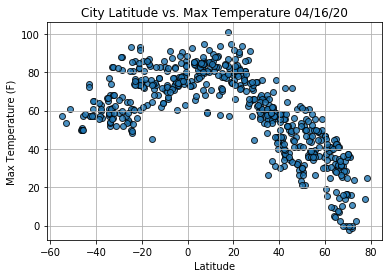

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

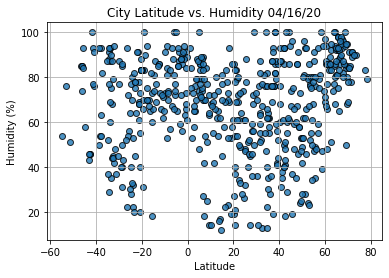

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

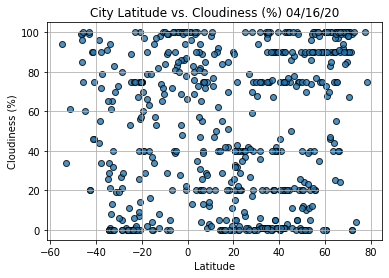

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

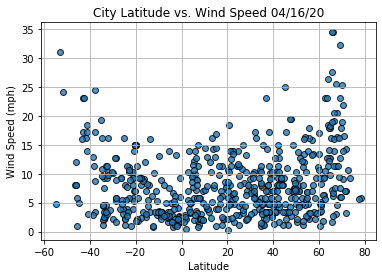

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ishigaki,JP,2020-04-17 02:28:42,24.34,124.16,78.80,74,40,11.41
3,Broome,US,2020-04-17 02:33:02,42.25,-75.83,30.99,50,20,8.05
4,Tilichiki,RU,2020-04-17 02:33:03,60.47,166.10,19.08,94,0,9.19
5,Albany,US,2020-04-17 02:33:03,42.60,-73.97,35.60,51,20,12.75
7,Hirara,JP,2020-04-17 02:33:03,24.80,125.28,77.00,61,40,13.87
...,...,...,...,...,...,...,...,...,...
557,Lagos,NG,2020-04-17 02:34:34,6.58,3.75,84.20,83,20,8.05
558,Kavaratti,IN,2020-04-17 02:35:28,10.57,72.64,84.43,67,100,4.38
559,Adrar,MR,2020-04-17 02:35:29,20.50,-10.07,83.05,14,32,7.00
560,Matara,LK,2020-04-17 02:35:29,5.95,80.54,84.74,71,4,2.93


In [55]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [56]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [65]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

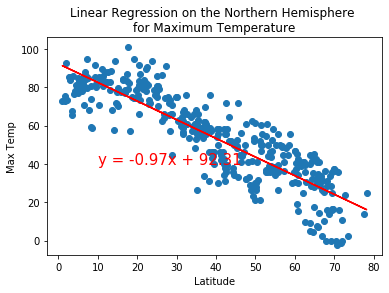

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                       'for Maximum Temperature', 'Max Temp',(10,40))

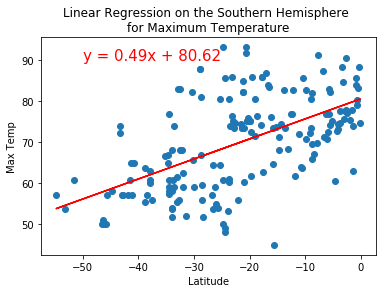

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Maximum Temperature', 'Max Temp',(-50,90))

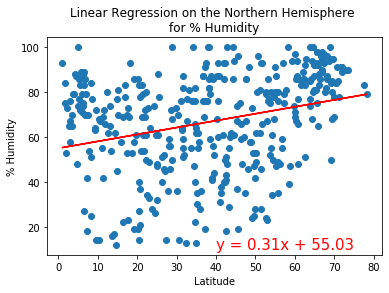

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Humidity', '% Humidity',(40,10))

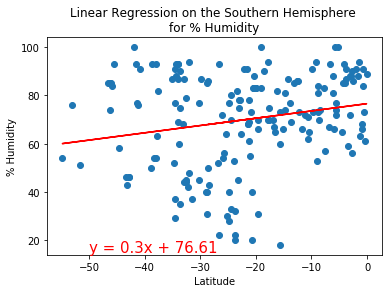

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Humidity', '% Humidity',(-50,15))

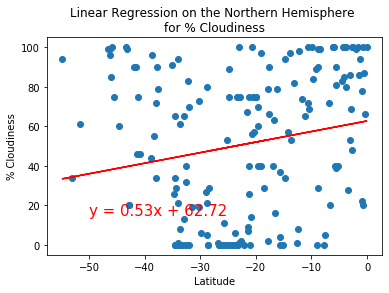

In [70]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(-50,15))

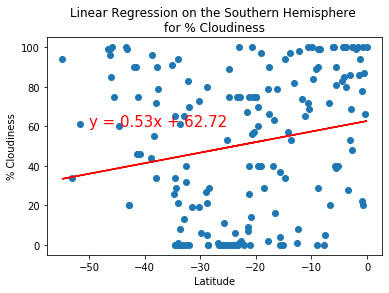

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(-50,60))

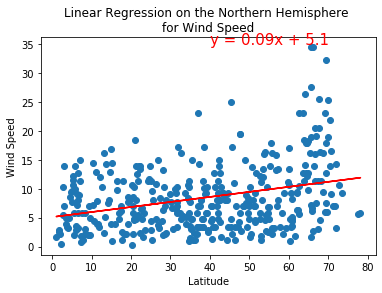

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                       'for Wind Speed', 'Wind Speed',(40,35))

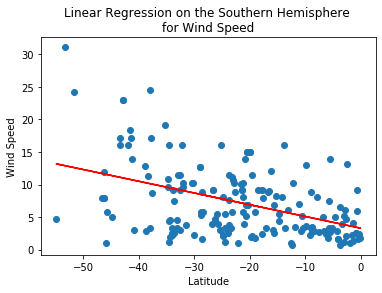

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                       'for Wind Speed', 'Wind Speed',(-50,35))